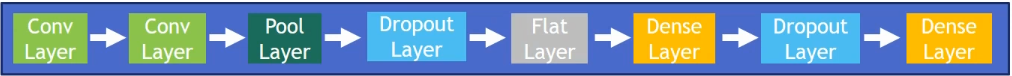

In [8]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Flatten, Dense, Dropout

In [12]:
# 데이터 불러오기
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

# 텐서로 변환(높이, 너비, 채널)
x_train=x_train.reshape(-1, 32, 32, 3)
x_test=x_test.reshape(-1, 32, 32, 3)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

# 정규화
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

(50000, 32, 32, 3) (10000, 32, 32, 3)
(50000, 1) (10000, 1)


In [14]:
# CNN 모델 구축
cnn = Sequential()

cnn.add(Conv2D(input_shape=(32, 32, 3), kernel_size=(3, 3), filters=32, activation='relu'))
cnn.add(Conv2D(kernel_size=(3,3), filters= 64, activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

# 3차원 텐서를 1차원 벡터로 변경
cnn.add(Flatten())

#은닉층 개념
cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10, activation='softmax'))

cnn.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               1605760   
_________________________________________________________________
dropout_11 (Dropout)         (None, 128)              

In [15]:
# CNN 모델 컴파일 및 학습
cnn.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

hist = cnn.fit(x_train, y_train, batch_size=128, epochs=30, validation_data=(x_test, y_test))

Epoch 1/30
391/391 [==============================] - 13s 15ms/step - loss: 1.6760 - accuracy: 0.3897 - val_loss: 1.2975 - val_accuracy: 0.5539
Epoch 2/30
391/391 [==============================] - 6s 14ms/step - loss: 1.3424 - accuracy: 0.5210 - val_loss: 1.1302 - val_accuracy: 0.6002
Epoch 3/30
391/391 [==============================] - 6s 14ms/step - loss: 1.2114 - accuracy: 0.5710 - val_loss: 1.0889 - val_accuracy: 0.6232
Epoch 4/30
391/391 [==============================] - 6s 14ms/step - loss: 1.1337 - accuracy: 0.6019 - val_loss: 0.9986 - val_accuracy: 0.6559
Epoch 5/30
391/391 [==============================] - 6s 14ms/step - loss: 1.0763 - accuracy: 0.6184 - val_loss: 0.9748 - val_accuracy: 0.6672
Epoch 6/30
391/391 [==============================] - 6s 14ms/step - loss: 1.0335 - accuracy: 0.6329 - val_loss: 0.9413 - val_accuracy: 0.6781
Epoch 7/30
391/391 [==============================] - 6s 14ms/step - loss: 0.9936 - accuracy: 0.6464 - val_loss: 0.9234 - val_accuracy: 0.681

In [17]:
# 모델(정확도) 평가
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9327 - accuracy: 0.7081


[0.9327412247657776, 0.7081000208854675]

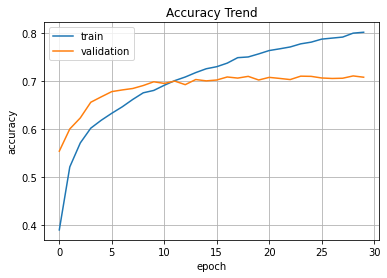

In [19]:
# 정확도 및 손실
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy Trend')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best')
plt.grid()
plt.show()

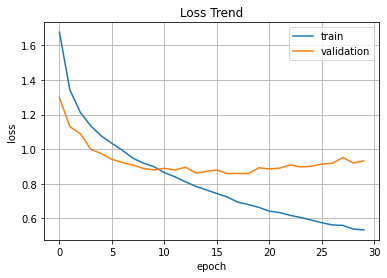

In [21]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss Trend')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best')
plt.grid()
plt.show()

CNN 성능 향상(오버피팅↘, 정확도↗)
1. 더 많은 레이어(layer) 쌓기
    1. 컨볼루현 레이어가 중첩된 더 깊은 구조가 될수록 성능은 크게 향상됨
2. 이미지 데이터 보강(image Data Augmentation)
    1. 딥러닝에서는 많은 학습 데이터를 사용하면 성능을 개선 시킬 수 있음
    2. 기존의 (이미지)데이터가 있을 때, 해당 데이터를 원본으로 해서 다양한 번형(rotate, shear, zoom, shift, horizontal flip...)을 주고, 이렇게 생성된 데이터를 원본 학습 데이터에 포함시켜 수 많은 학습 데이터를 확보할 수 있음
3. 높은 해상도(High Resolution) 학습 데이터 확보
    1. 동일한 CNN구조라면, 상대적으로 높은 해상도의 학습데이터를 통해서 성능을 개선 시킬수 있음 → [CIFAR 10] 32 X 32 → [ImageNet image] 469 x 387
4. L1 Norm·L2 Norm 등의 가중치 규제(Regularzation), Dropout, 배치 정규화(Batch Normalization) 등을 통해 성능을 개선 시킬 수 있음
    